# Предобработка

In [1]:
import torch
import gc

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# DEVICE = torch.device("cpu")

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer

CLASSES = [
   'T1003.001', 'T1005', 'T1012', 'T1016', 'T1021.001', 'T1027',
   'T1033', 'T1036.005', 'T1041', 'T1047', 'T1053.005', 'T1055',
   'T1056.001', 'T1057', 'T1059.003', 'T1068', 'T1070.004',
   'T1071.001', 'T1072', 'T1074.001', 'T1078', 'T1082', 'T1083',
   'T1090', 'T1095', 'T1105', 'T1106', 'T1110', 'T1112', 'T1113',
   'T1140', 'T1190', 'T1204.002', 'T1210', 'T1218.011', 'T1219',
   'T1484.001', 'T1518.001', 'T1543.003', 'T1547.001', 'T1548.002',
   'T1552.001', 'T1557.001', 'T1562.001', 'T1564.001', 'T1566.001',
   'T1569.002', 'T1570', 'T1573.001', 'T1574.002'
]

mlb = MultiLabelBinarizer(classes=CLASSES)
mlb.fit([[c] for c in CLASSES])


MultiLabelBinarizer(classes=['T1003.001', 'T1005', 'T1012', 'T1016',
                             'T1021.001', 'T1027', 'T1033', 'T1036.005',
                             'T1041', 'T1047', 'T1053.005', 'T1055',
                             'T1056.001', 'T1057', 'T1059.003', 'T1068',
                             'T1070.004', 'T1071.001', 'T1072', 'T1074.001',
                             'T1078', 'T1082', 'T1083', 'T1090', 'T1095',
                             'T1105', 'T1106', 'T1110', 'T1112', 'T1113', ...])

In [3]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import AutoTokenizer
# Загрузка модели и токенизатора
# checkpoint = 'ehsanaghaei/SecureBERT'
checkpoint = "bert-base-uncased"
# tokenizer = RobertaTokenizer.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import pandas as pd
import numpy as np
np.random.seed(0)

# data = pd.read_json('data/multi_label.json').drop(columns='doc_title')

# data = data[data['labels'].str.len()>1]

# idx = np.arange(data.shape[0])
# np.random.shuffle(idx)

# tr_idx, val_idx, ts_idx = np.split(idx, [round(0.8*len(idx)), round(0.9*len(idx))])

data = pd.read_csv('data/data_df.csv')

tr_idx = data.query('train==1').index
val_idx = data.query('valid==1').index
ts_idx = data.query('test==1').index

In [8]:
def prep_xy(data, idx, tokenizer, mlb, to_device=True):
  texts = data.loc[data.index[idx], 'sentence'].to_list()
  texts = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, add_special_tokens=True)
  if to_device:
    texts  = texts.to(DEVICE)

  labels = mlb.transform(data.loc[data.index[idx], 'labels'].to_list())
  labels = torch.Tensor(labels)
  if to_device:
    labels = labels.to(DEVICE)

  return texts, labels

In [9]:
manual_tr = False
if manual_tr:
    text_tr, labels_tr = prep_xy(data, tr_idx, tokenizer, mlb, to_device=True)
    text_val, labels_val = prep_xy(data, val_idx, tokenizer, mlb, to_device=True)
    text_ts, labels_ts = prep_xy(data, ts_idx, tokenizer, mlb, to_device=True)
else:
    
    text_tr, labels_tr = prep_xy(data, tr_idx, tokenizer, mlb, to_device=False)
    text_val, labels_val = prep_xy(data, val_idx, tokenizer, mlb, to_device=False)
    text_ts, labels_ts = prep_xy(data, ts_idx, tokenizer, mlb, to_device=False)



C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) [' ', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'T', '[', ']'] will be ignored
  warnings.warn(


# Данные под модель

## datasets

In [10]:
from datasets import Dataset

tr_dataset = Dataset.from_dict({**text_tr, **{'labels':labels_tr}})
val_dataset = Dataset.from_dict({**text_val, **{'labels':labels_val}})
ts_dataset = Dataset.from_dict({**text_ts, **{'labels':labels_ts}})


In [11]:
from datasets import DatasetDict


# Объединение этих датасетов в DatasetDict
dataset_d = DatasetDict({
    'train': tr_dataset,
    'validation': val_dataset,
    'test': ts_dataset
})


In [12]:
tokenizer.decode(dataset_d['test'][0]['input_ids'])

'[CLS] the latest variant demonstrates that threat actors have adopted more obfuscation techniques, including abusing exception mechanisms to obfuscate the execution flow of programs and windows api hashing. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [13]:
dataset_d.set_format("torch")

## dataloader 
с TensorDataset

# Функции

In [12]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from transformers import EvalPrediction
from sklearn.metrics import log_loss
from scipy.special import expit
import numpy as np
import torch.nn as nn



def multilabel_bce_with_logits(y_true, y_pred):
    y_pred = np.vectorize(lambda x: expit(x))(y_pred)
    losses = []
    for i in range(y_true.shape[1]): # проходим по каждому классу
        losses.append(log_loss(y_true[:, i], y_pred[:, i], labels=[0, 1]))
    return np.mean(losses)


def multi_label_metrics(y_pred, y_true, threshold=0.5):

    bce_torch =  nn.BCEWithLogitsLoss()(y_pred, y_true)
    # bce_loss = multilabel_bce_with_logits(y_true.numpy(), y_pred)
    
    probs = torch.nn.Sigmoid()(torch.Tensor(y_pred))
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # y_pred = torch.vstack([predictions]).sigmoid().gt(threshold).to(int)

    # import pdb;pdb.set_trace()
    # f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')

    precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average='micro')

    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    
    
    metrics = {'f1': fscore,
               'precision':precision,
               'recall':recall,
               'support':support,
               'roc_auc': roc_auc,
               'accuracy': accuracy, 
              'bce_loss':bce_torch.item()}
    
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        y_true=p.label_ids)
    return result


In [13]:
def model_evaluate(model, mlb, dataset_d, batch_size, eval_set, metrics, device='cpu', thresh=0.5, refresh_cache_iter=20):
    
    preds_l = get_preds(model=model, dataset_d=dataset_d, batch_size=batch_size, 
                      eval_set=eval_set, device=device, refresh_cache_iter=refresh_cache_iter)
    

    binary_preds = torch.vstack([it.logits for it in preds_l]).sigmoid().gt(thresh).to(int)

    preds_ser = pd.Series(mlb.inverse_transform(binary_preds.cpu()))
    actual_ser = pd.Series(mlb.inverse_transform(dataset_d[eval_set]['labels']))
    res_df = pd.concat({'predicted': preds_ser, 'actual': actual_ser}, axis=1)
    

    return res_df
    
def get_preds(model, dataset_d, batch_size, eval_set, device='cpu', refresh_cache_iter=5):
    
    preds_l = []
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(batchify_ds(dataset_d[eval_set], batch_size=batch_size)):
            preds = model(input_ids=batch['input_ids'].to(device), 
                        attention_mask=batch['attention_mask'].to(device))

            preds_l.append(preds)
            
            if i%refresh_cache_iter==0:
                torch.cuda.empty_cache()
                gc.collect()
                
    return preds_l



def batchify_ds(ds, batch_size=10):
    for i in range(0, ds.num_rows, batch_size):
        slc = slice(i, i + batch_size)
        yield ds[slc]


# Обучение

In [14]:
data.iloc[ts_idx].head(1)

,sentence,labels
17831,"However, we can confirm that developers did in...","[T1083, T1033, T1082]"


In [15]:
id2label = {i: label for i, label in enumerate(mlb.classes_)}
label2id = {v:k for k, v in id2label.items()}

# model = RobertaForSequenceClassification.from_pretrained(checkpoint,
#                  num_labels=len(CLASSES), problem_type="multi_label_classification",
#                  id2label=id2label, label2id=label2id)

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint,
                                                           num_labels=len(CLASSES), problem_type="multi_label_classification",
                 id2label=id2label, label2id=label2id)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
torch.cuda.empty_cache()
gc.collect()

7

## manual

In [17]:
import torch.nn as nn
from torch.optim import AdamW, RMSprop
from tqdm.auto import tqdm

epoch_num = 10
train_set = 'train'
eval_set = 'validation'
batch_tr_size = 5
batch_val_size = 5
refresh_cache_iter = 20

loss_fn = nn.BCEWithLogitsLoss()
device = DEVICE
val_iter_num = 1
val_tr_f = True
# dataset_d = dataset_d
# model = model
lr = 0.001

# optimizer = AdamW(model.parameters())
optimizer = RMSprop(model.parameters(), lr=lr)
model = model.to(device)
progress_bar = tqdm(range(epoch_num))

res_df_l = [] 
for epoch in range(1, epoch_num+1):
    
    for i, batch in enumerate(batchify_ds(dataset_d[train_set], batch_size=batch_tr_size)):

        model.train()
    
        outs = model(input_ids=batch['input_ids'].to(device), 
                        attention_mask=batch['attention_mask'].to(device))
        
        loss = loss_fn(outs.logits, batch['labels'].to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epoch%val_iter_num==0:
        preds_l = get_preds(model, dataset_d, batch_size = batch_val_size, eval_set=eval_set, 
                     device=device, refresh_cache_iter=refresh_cache_iter)

        res_d = multi_label_metrics(torch.vstack([it.logits for it in preds_l]).to('cpu'), dataset_d[eval_set]['labels'])

        res_eval_df = pd.DataFrame(res_d, index=[epoch])
        res_eval_df = res_eval_df.rename(columns={it:f'val_{it}' for it in res_eval_df.columns})
        
        if val_tr_f:
        
            preds_l = get_preds(model, dataset_d, batch_size = batch_val_size, eval_set=train_set, 
             device=device, refresh_cache_iter=refresh_cache_iter)

            res_d = multi_label_metrics(torch.vstack([it.logits for it in preds_l]).to('cpu'), dataset_d[train_set]['labels'])
            
            res_tr_df = pd.DataFrame(res_d, index=[epoch])
            res_tr_df = res_tr_df.rename(columns={it:f'tr_{it}' for it in res_tr_df.columns})
            res_df = res_eval_df.join(res_tr_df)
            
        else:
            res_df = res_eval_df
        res_df_l.append(res_df)
            
        print(f'В эпоху {epoch} ошибки - {res_df}')
    
    torch.cuda.empty_cache()
    gc.collect()
    
    progress_bar.update(1)
    
res_df = pd.concat(res_df_l)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` p

В эпоху 1 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
1     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
1      0.198054    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
1          0.0     0.172196  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|████████████████▍                                                                 | 2/10 [07:24<29:39, 222.41s/it]

В эпоху 2 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
2     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
2      0.196487    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
2          0.0     0.171665  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 30%|████████████████████████▌                                                         | 3/10 [11:06<25:55, 222.24s/it]

В эпоху 3 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
3     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
3       0.19888    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
3          0.0     0.172452  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 40%|████████████████████████████████▊                                                 | 4/10 [14:48<22:12, 222.05s/it]

В эпоху 4 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
4     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
4       0.19673    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
4          0.0     0.171471  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 50%|█████████████████████████████████████████                                         | 5/10 [18:30<18:29, 221.84s/it]

В эпоху 5 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
5     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
5      0.193186    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
5          0.0      0.16969  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 60%|█████████████████████████████████████████████████▏                                | 6/10 [22:12<14:47, 221.86s/it]

В эпоху 6 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
6     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
6      0.186766    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
6          0.0     0.165193  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [25:53<11:05, 221.74s/it]

В эпоху 7 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
7     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
7      0.187685    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
7          0.0     0.165443  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [29:35<07:23, 221.69s/it]

В эпоху 8 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
8     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
8      0.186829    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
8          0.0     0.164886  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [33:16<03:41, 221.72s/it]

В эпоху 9 ошибки -    val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
9     0.0            0.0         0.0        None          0.5           0.0   

   val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
9       0.18779    0.0           0.0        0.0       None         0.5   

   tr_accuracy  tr_bce_loss  
9          0.0     0.165162  


C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [36:58<00:00, 221.71s/it]

В эпоху 10 ошибки -     val_f1  val_precision  val_recall val_support  val_roc_auc  val_accuracy  \
10     0.0            0.0         0.0        None          0.5           0.0   

    val_bce_loss  tr_f1  tr_precision  tr_recall tr_support  tr_roc_auc  \
10      0.186725    0.0           0.0        0.0       None         0.5   

    tr_accuracy  tr_bce_loss  
10          0.0     0.164742  


<Axes: xlabel='None', ylabel='val_bce_loss'>

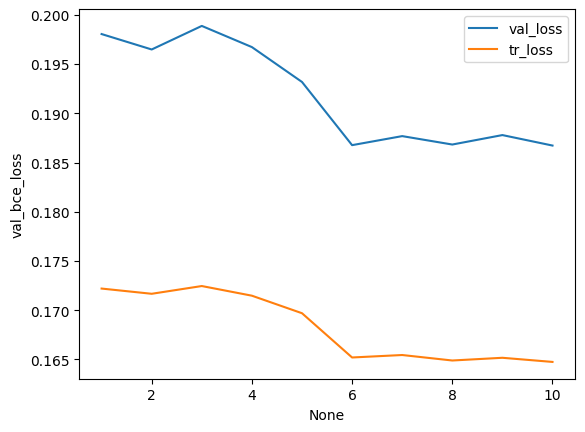

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=res_df, x=res_df.index, y='val_bce_loss', label='val_loss')

sns.lineplot(data=res_df, x=res_df.index, y='tr_bce_loss', label='tr_loss')
# plt.legend()

## auto 

Обучаю нейросеть с помощью transformers.Trainer. Опиши формат функции, которую получает Trainer в аргументе compute_metrics. Что она получает на входе и выдает на выходе


In [14]:
from transformers import TrainingArguments, Trainer


args = TrainingArguments(
    f"sec_bert-finetuned",
    eval_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epoch,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    
)

trainer = Trainer(
    model,
    args,
    train_dataset=dataset_d["train"],
    eval_dataset=dataset_d["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

In [17]:
trainer.evaluate()


{'eval_loss': 0.23564545810222626,
 'eval_f1': 0.0,
 'eval_roc_auc': 0.5,
 'eval_accuracy': 0.0,
 'eval_runtime': 5.004,
 'eval_samples_per_second': 16.587,
 'eval_steps_per_second': 3.397,
 'epoch': 5.0}

## сохранение и загрузка модели

In [27]:
from transformers import AutoModelForSequenceClassification

bertmodel = AutoModelForSequenceClassification.from_pretrained("data/sec_bert")


# predict test

## батчуем

### dataloader

In [31]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding
batch_size=10
# тут DataCollatorWithPadding особо ничего не даст, так как мы уже отступили до максимума по модели, когда кодировали.
# возможно потом лучше сделать 
tr_dataloader = DataLoader(
    dataset_d["train"], shuffle=True, num_workers = 0, 
    batch_size=batch_size, collate_fn=DataCollatorWithPadding(tokenizer=tokenizer)
)

In [55]:
batch_l = []
for batch in tr_dataloader:
    batch_l.append(batch['input_ids'].shape)
    
print(len(batch_l), batch_l[-1])

42 torch.Size([9, 512])


### manual

In [17]:
def batchify_ds(ds, batch_size=10):
    for i in range(0, ds.num_rows, batch_size):
        slc = slice(i, i + batch_size)
        yield ds[slc]


In [73]:
for batch in batchify_ds(dataset_d["train"], batch_size=batch_size):
    batch_l.append(batch['input_ids'].shape)
    
print(len(batch_l), batch_l[-1])

109 torch.Size([5, 512])


## pred

### подбор порога

In [32]:
preds_l = get_preds(bertmodel, dataset_d, batch_size = 10, eval_set='validation', 
                         device=DEVICE, refresh_cache_iter=20)



In [33]:
res_metrics_l = []

for thresh in np.arange(0.05, 0.95, 0.05):
    
    res_d = multi_label_metrics(torch.vstack([it.logits for it in preds_l]).to(device='cpu'), dataset_d['test']['labels'], threshold=thresh)
    res_metrics_df = pd.DataFrame(res_d, index=[thresh])
    res_metrics_l.append(res_metrics_df)
    
pd.concat([it for it in res_metrics_l], axis=0)

C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\tools\Anaconda3\envs\pytorch

,f1,precision,recall,support,roc_auc,accuracy,bce_loss
0.05,0.178533,0.112450,0.432990,None,0.632698,0.000000,0.180199
0.10,0.202312,0.140562,0.360825,None,0.626317,0.000000,0.180199
0.15,0.180587,0.160643,0.206186,None,0.576677,0.000000,0.180199
0.20,0.177778,0.192771,0.164948,None,0.565538,0.036145,0.180199
0.25,0.115523,0.192771,0.082474,None,0.532769,0.000000,0.180199
0.30,0.000000,0.000000,0.000000,None,0.500000,0.000000,0.180199
0.35,0.000000,0.000000,0.000000,None,0.500000,0.000000,0.180199
0.40,0.000000,0.000000,0.000000,None,0.500000,0.000000,0.180199
0.45,0.000000,0.000000,0.000000,None,0.500000,0.000000,0.180199
0.50,0.000000,0.000000,0.000000,None,0.500000,0.000000,0.180199


### оценка

In [28]:
thresh = 0.1

res_df = model_evaluate(bertmodel, mlb, dataset_d, batch_size = 10, eval_set='validation', 
                         metrics=None, device=DEVICE, refresh_cache_iter=20, thresh=thresh)
    

In [31]:
res_df

,predicted,actual
0,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1059.003, T1105)"
1,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1033, T1082)"
2,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1021.001, T1078)"
3,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1484.001, T1562.001)"
4,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1041, T1074.001)"
...,...,...
78,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1033, T1106)"
79,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1059.003, T1562.001, T1570)"
80,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1021.001, T1078)"
81,"(T1027, T1055, T1078, T1082, T1105, T1106, T1140)","(T1056.001, T1113)"


In [30]:
res_df['predicted']

0     (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
1     (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
2     (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
3     (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
4     (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
                            ...                        
78    (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
79    (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
80    (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
81    (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
82    (T1027, T1055, T1078, T1082, T1105, T1106, T1140)
Name: predicted, Length: 83, dtype: object

# пример из дока hugging face

In [ ]:
from transformers import AutoTokenizer, RobertaForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion", problem_type="multi_label_classification")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_ids = torch.arange(0, logits.shape[-1])[torch.sigmoid(logits).squeeze(dim=0) > 0.5]


In [ ]:
num_labels = len(model.config.id2label)
model.config.id2label


In [ ]:

model = RobertaForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-emotion", num_labels=num_labels, problem_type="multi_label_classification"
)

labels = torch.sum(
    torch.nn.functional.one_hot(predicted_class_ids[None, :].clone(), num_classes=num_labels), dim=1
).to(torch.float)
loss = model(**inputs, labels=labels).loss

# как кормить нейронку

In [ ]:
def batch_data(x, y, batch_size=10):
    x_len, y_len = x.shape[0], y.shape[0]
    assert x_len == y_len
    for i in range(0, x_len, batch_size):
        slc = slice(i, i + batch_size)
        yield x[slc].to(DEVICE), y[slc].to(DEVICE)


In [ ]:
out = bert(x, attention_mask=x.ne(tokenizer.pad_token_id).to(int), labels=y)

In [ ]:
x, y = next(batch_data(text_tr, labels_tr))

In [ ]:
x.ne(tokenizer.pad_token_id).to(int)

In [ ]:
y.shape

In [ ]:
model.zero_grad()
out = model(x)


epoch_losses.append(out.loss.item())
out.loss.backward()
optim.step()

# chin net

Приведи код, как использовать secure bert для классификации типов хакерских атак. добавь цикл fine_tune с multilabel target, сделай это используя методы huggingface pytorch

In [ ]:
Использование BERT для задачи классификации может быть сложным процессом, особенно при работе с многоклассовой или многометочной классификацией. Ниже представлен пример кода на Python, который использует библиотеку transformers от Hugging Face для fine-tuning модели BERT.

Примечание: "Secure BERT" не является официальной моделью в библиотеке Hugging Face, поэтому я предполагаю, что вы имеете в виду обычную модель BERT.


from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import torch
import pandas as pd

# Предполагается, что у вас есть DataFrame с двумя колонками: 'text' и 'labels'
df = pd.read_csv('your_data.csv')

train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'], df['labels'], test_size=0.2)

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)
        }

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['labels'].unique()))

training_args = TrainingArguments(
    output_dir='./results',          # директория для сохранения результатов обучения
    num_train_epochs=3,              # количество эпох обучения
    per_device_train_batch_size=16,  # размер батча для обучения
    per_device_eval_batch_size=64,   # размер батча для валидации
    warmup_steps=500,                # количество шагов разогрева для lr scheduler
    weight_decay=0.01               # коэффициент регуляризации L2
)

train_dataset = CustomDataset(train_texts, train_labels, tokenizer, max_len=128)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer, max_len=128)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()

# Links

- [secure robert](https://huggingface.co/ehsanaghaei/SecureBERT/tree/main)
- [fine tune берта для мультиклссификации](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/BERT/Fine_tuning_BERT_(and_friends)_for_multi_label_text_classification.ipynb)
- [multi_label](https://huggingface.co/docs/transformers/v4.41.3/en/model_doc/roberta#transformers.RobertaForSequenceClassification)
- [пример файн тюна мульти лэбел](https://github.com/abhimishra91/transformers-tutorials/blob/master/transformers_multi_label_classification.ipynb)
- [еще ссылки на файн тюны с хаггинг](https://discuss.huggingface.co/t/fine-tune-for-multiclass-or-multilabel-multiclass/4035/3)
- [ссылка на описание предметной области](https://arxiv.org/pdf/2204.02685)
- [colab example](https://www.kaggle.com/code/amcsiboy/dontpatronizeme-roberta-base-multilabel)
- [colab notebook with several models tokenizers](https://www.kaggle.com/code/piyushrg/roberta-for-multi-label-classification)
- [ограничения на типы при мультилэйбл](https://www.alexanderjunge.net/blog/til-multi-label-automodelforsequenceclassification/)

# Mitre project

In [ ]:
!git clone https://github.com/dessertlab/cti-to-mitre-with-nlp.git  '/content/drive/MyDrive/Colab Notebooks/texts/sec_bert/cti-to-mitre-with-nlp'

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/texts/sec_bert/additional_files.zip' -d '/content/drive/MyDrive/Colab Notebooks/texts/sec_bert/cti-to-mitre-with-nlp'

# Остальное

## проверка работы метрик

In [15]:
from transformers import AutoModelForSequenceClassification

bertmodel = AutoModelForSequenceClassification.from_pretrained("data/sec_bert")

In [21]:
preds_l = get_preds(bertmodel, dataset_d, batch_size = 10, eval_set='test', 
                         device=DEVICE, refresh_cache_iter=20)

multi_label_metrics(torch.vstack([it.logits for it in preds_l]).to(device='cpu'), dataset_d['test']['labels'])

C:\tools\Anaconda3\envs\pytorch_env\lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


{'f1': 0.0, 'roc_auc': 0.5, 'accuracy': 0.0}

In [53]:
# Предположим, что у нас есть следующие истинные метки и логиты:
y_true = np.array([[1, 0, 1], [0, 1, 1], [1, 1, 0]])
y_pred = np.array([[1.0, -1.0, -2], [1, 0.8, 1.2], [0.9, 0.7, -0.3]])

multi_label_metrics(torch.tensor(y_pred, dtype=torch.float32), torch.tensor(y_true, dtype=torch.float32))

{'f1': 0.8333333333333334,
 'roc_auc': 0.7500000000000002,
 'accuracy': 0.3333333333333333,
 'bce_loss': 0.666643500328064}

In [ ]:
pred = torch.vstack([it.logits for it in preds_l]).to(device='cpu')
y = dataset_d['test']['labels']

multilabel_bce_with_logits(y.numpy(), pred.numpy())

0.2325911542705502